<a href="https://colab.research.google.com/github/iamsamyukthak/dna-gc-analyzer/blob/main/dna_dc_content_analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.6 MB/s eta 0:00:00


In [2]:
fasta_content = """>seq1
ATGCGCGATCGATCGATCGATCGTAGCTAGCTAGCGC
>seq2
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
>seq3
GGGCGCGGGCGCGCGGGCGCGCGCGCGCGCGC
"""

with open("sequences.fasta", "w") as f:
    f.write(fasta_content)


In [4]:
from Bio import SeqIO

def parse_fasta(filepath):
    return [(record.id, str(record.seq)) for record in SeqIO.parse(filepath, "fasta")]

seqs = parse_fasta("sequences.fasta")
print(f"Parsed {len(seqs)} sequences")
for sid, seq in seqs:
    print(f">{sid}\n{seq}")


Parsed 3 sequences
>seq1
ATGCGCGATCGATCGATCGATCGTAGCTAGCTAGCGC
>seq2
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
>seq3
GGGCGCGGGCGCGCGGGCGCGCGCGCGCGCGC


  Sequence_ID  GC_Content
0        seq1       56.76
1        seq2        0.00
2        seq3      100.00


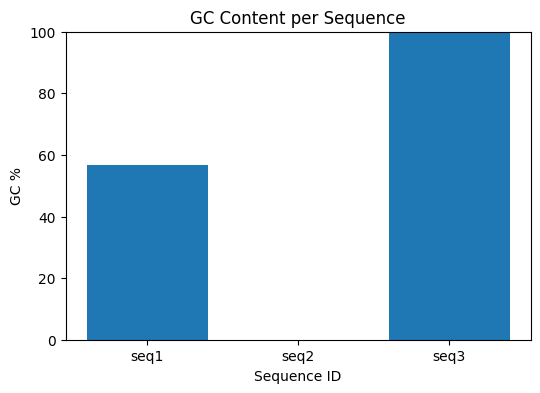

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def compute_gc(seq):
    """Return GC% of a sequence as float."""
    g = seq.count("G")
    c = seq.count("C")
    gc_content = 100 * (g + c) / len(seq) if len(seq) > 0 else 0
    return round(gc_content, 2)

# Calculate GC% for each sequence
gc_data = [(sid, compute_gc(seq)) for sid, seq in seqs]

# Put into a DataFrame for easy handling
df = pd.DataFrame(gc_data, columns=["Sequence_ID", "GC_Content"])
print(df)

# --- Visualization ---
plt.figure(figsize=(6,4))
plt.bar(df["Sequence_ID"], df["GC_Content"])
plt.title("GC Content per Sequence")
plt.xlabel("Sequence ID")
plt.ylabel("GC %")
plt.ylim(0, 100)
plt.show()


  Sequence_ID  GC_Content
0        seq1       56.76
1        seq2        0.00
2        seq3      100.00


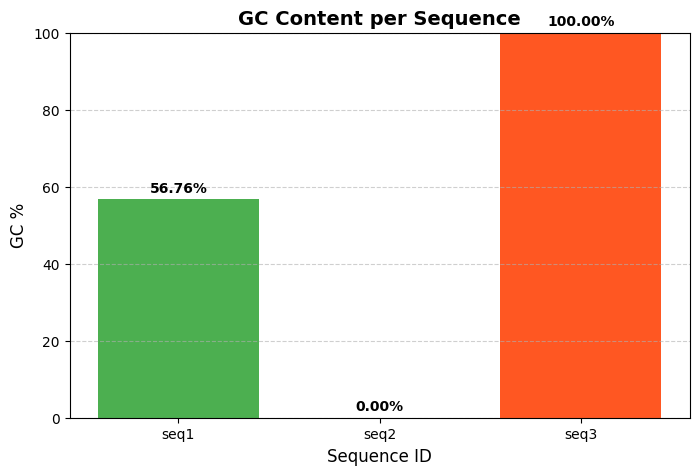

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def compute_gc(seq):
    """Return GC% of a sequence as float."""
    g = seq.count("G")
    c = seq.count("C")
    gc_content = 100 * (g + c) / len(seq) if len(seq) > 0 else 0
    return round(gc_content, 2)

# Calculate GC% for each sequence
gc_data = [(sid, compute_gc(seq)) for sid, seq in seqs]

# Put into a DataFrame
df = pd.DataFrame(gc_data, columns=["Sequence_ID", "GC_Content"])
print(df)

# --- Improved Visualization ---
plt.figure(figsize=(8,5))
bars = plt.bar(df["Sequence_ID"], df["GC_Content"], color=["#4CAF50", "#2196F3", "#FF5722"])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("GC Content per Sequence", fontsize=14, fontweight="bold")
plt.xlabel("Sequence ID", fontsize=12)
plt.ylabel("GC %", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()
